In [48]:
# Python với keras (CNN) nhận diện số 0-9
from keras.models import Sequential # init model
from keras.models import load_model
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import to_categorical
import numpy as np

In [60]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape
X_test.shape
y_test1 = y_test
# 60K ảnh cho train
# 10K ảnh cho test

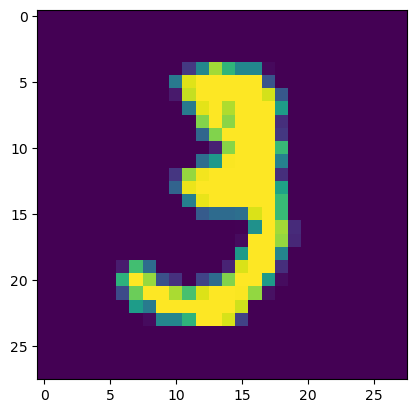

In [34]:
plt.imshow(X_train[10])

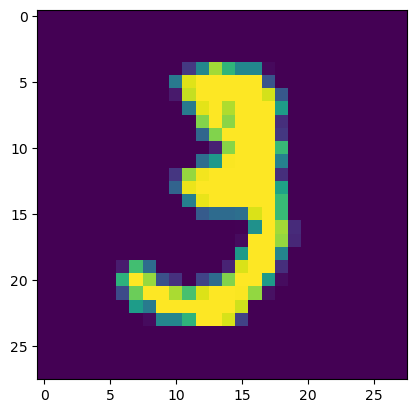

In [35]:
# Đưa tất cả hình ảnh về ảnh xám
# X_train = X_train.reshape(60000, 28, 28, 1)
# X_test = X_test.reshape(10000, 28, 28, 1) 

plt.imshow(X_train[10])

In [44]:
# Chuyển thành one hot vector tất cả là o chỉ có 1 phần tử 1 tất cả còn lại là 0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [45]:
# Create new model
model = Sequential() # Tuần tự

# Add model Layer
# kernel_size (vector trượt)
# relu (khử tuyến tính)
# padding=same (vẫn giữ kích thức 28, 28)
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1), padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1), padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))

model.add(Flatten())
model.add(Dense(10, activation='softmax')) # Phân loại đối tượng theo xác suất

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary() # Xem cấu trức model



Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 32)        18464     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 1568)              0         
                                                                 
 dense_3 (Dense)             (None, 10)               

In [47]:
model.fit(X_train, y_train, epochs=3, validation_data=(X_test, y_test))
model.save('../trained-model/number_detection.h5')

Epoch 1/3
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0480 - accuracy: 0.9858 - val_loss: 0.0509 - val_accuracy: 0.9845
Epoch 2/3
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0436 - accuracy: 0.9870 - val_loss: 0.0497 - val_accuracy: 0.9850
Epoch 3/3
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0360 - accuracy: 0.9893 - val_loss: 0.0577 - val_accuracy: 0.9831


In [71]:
model = load_model('../trained-model/number_detection.h5')

y_hat = model.predict(X_test[19:20])
y_hat

1/1 [==============================] - 0s 39ms/step


2023-01-19 09:59:53.232823: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


array([[3.70950498e-15, 1.27774015e-11, 1.10197956e-13, 9.32213376e-15,
        1.00000000e+00, 7.63118240e-15, 2.45305837e-17, 1.91659275e-08,
        2.57705812e-09, 4.16280704e-10]], dtype=float32)

In [72]:
y_label = np.argmax(y_hat, axis=1)
y_label

array([4])

In [73]:
y_test1[19]

4